In [10]:
import pandas as pd

import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# 1. DNN

In [11]:
df = pd.read_csv("dnn_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'val_loss', 'val_slot0_loss', 'val_slot1_loss',
        'val_slot2_loss', 'val_slot3_loss', 'val_slot4_loss', 'val_slot5_loss',
        'val_slot6_loss', 'val_slot0_accuracy', 'val_slot1_accuracy',
        'val_slot2_accuracy', 'val_slot3_accuracy', 'val_slot4_accuracy',
        'val_slot5_accuracy', 'val_slot6_accuracy', 'loss', 'slot0_loss',
        'slot1_loss', 'slot2_loss', 'slot3_loss', 'slot4_loss', 'slot5_loss',
        'slot6_loss', 'slot0_accuracy', 'slot1_accuracy', 'slot2_accuracy',
        'slot3_accuracy', 'slot4_accuracy', 'slot5_accuracy', 'slot6_accuracy'],
       dtype='object'),
 31)

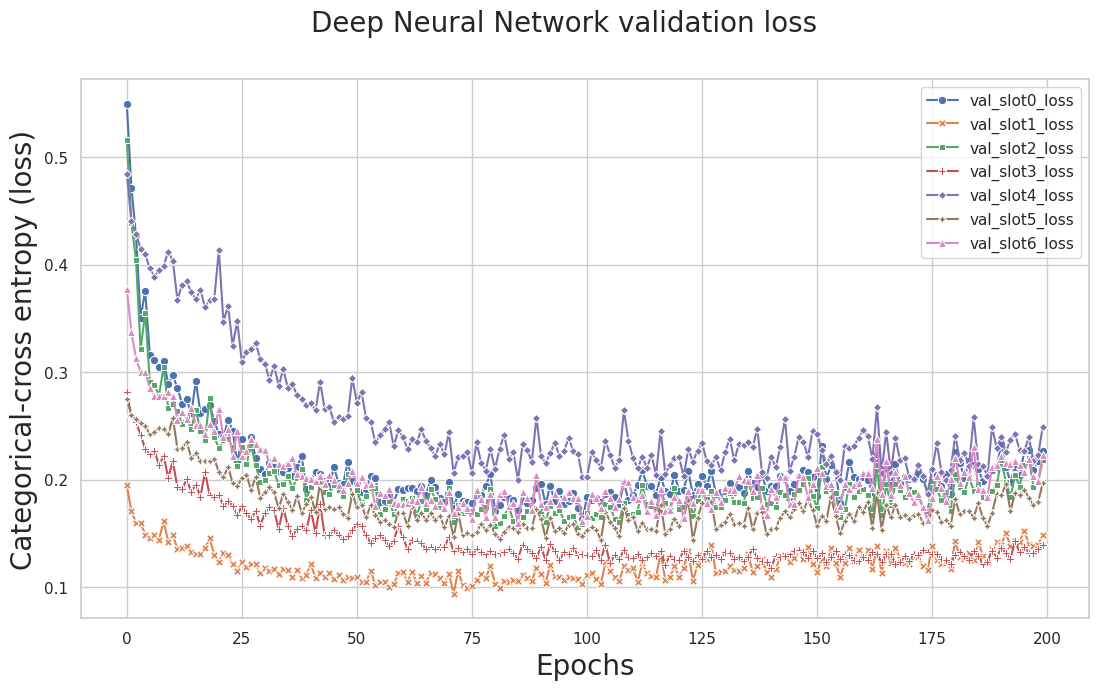

In [12]:
to_keep = []
for c in df.columns:
    if "loss" in c and "val_slot" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_val_loss = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_val_loss,markers=True, dashes=False)
fig.suptitle('Deep Neural Network validation loss ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Categorical-cross entropy (loss)", fontsize=20)
plt.legend(loc='upper right')

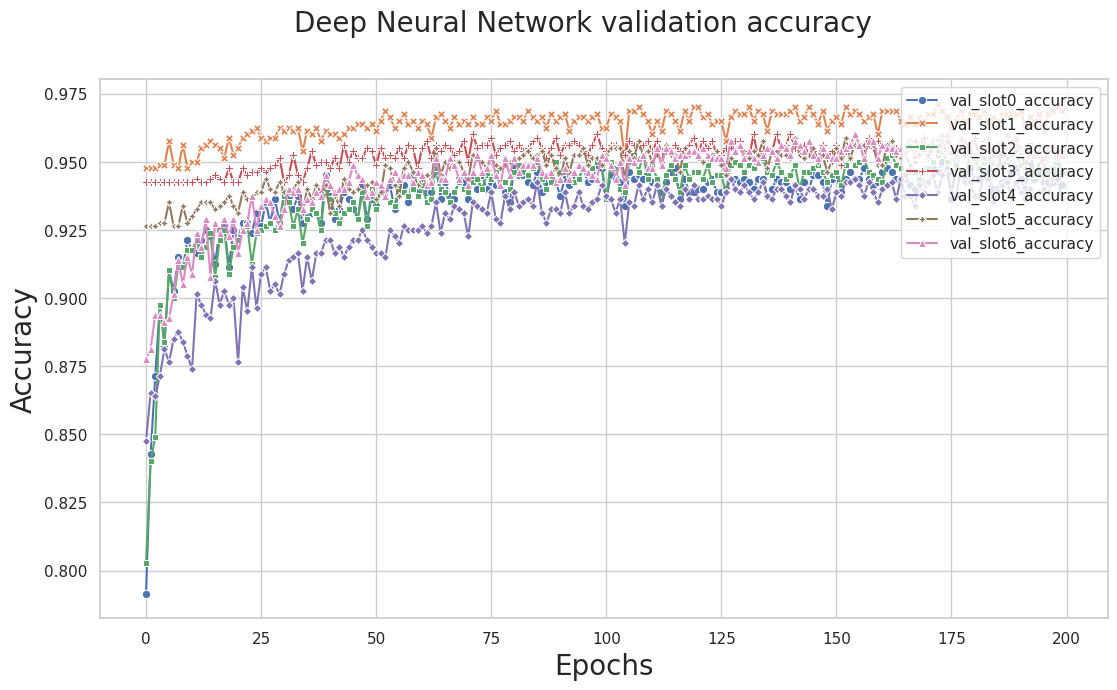

In [13]:
to_keep = []
for c in df.columns:
    if "accuracy" in c and "val_slot" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_val_acc = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_val_acc,markers=True, dashes=False)
fig.suptitle('Deep Neural Network validation accuracy ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(loc='upper right')

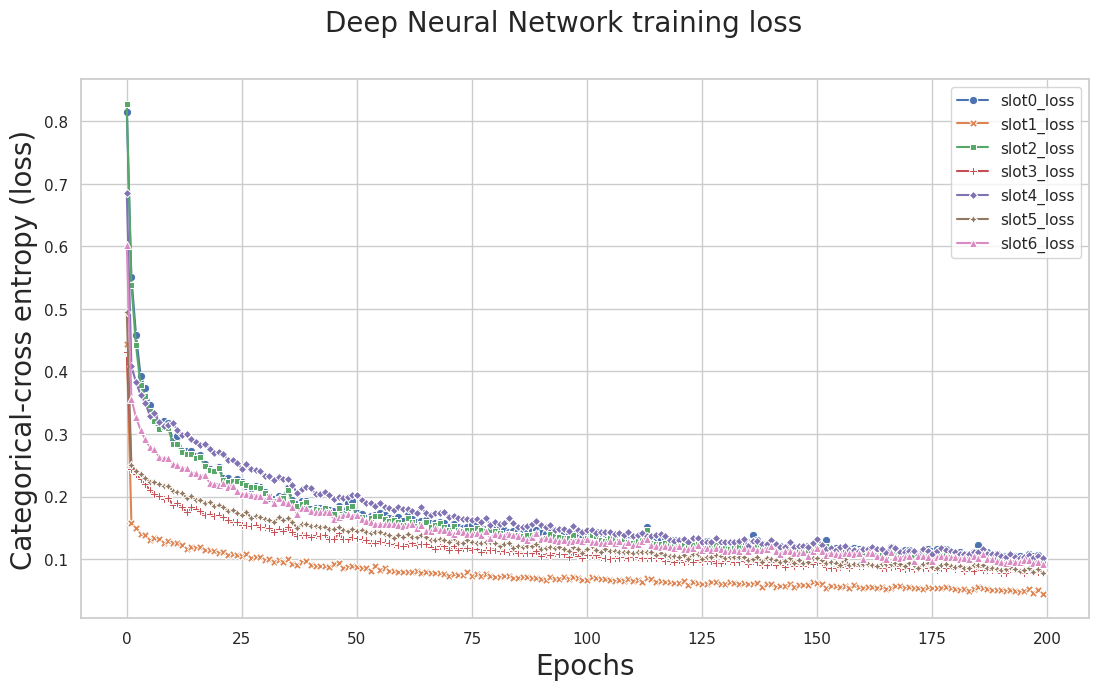

In [14]:
to_keep = []
for c in df.columns:
    if "loss" in c and "slot" in c and "val" not in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)

sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Deep Neural Network training loss ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Categorical-cross entropy (loss)", fontsize=20)
plt.legend(loc='upper right')

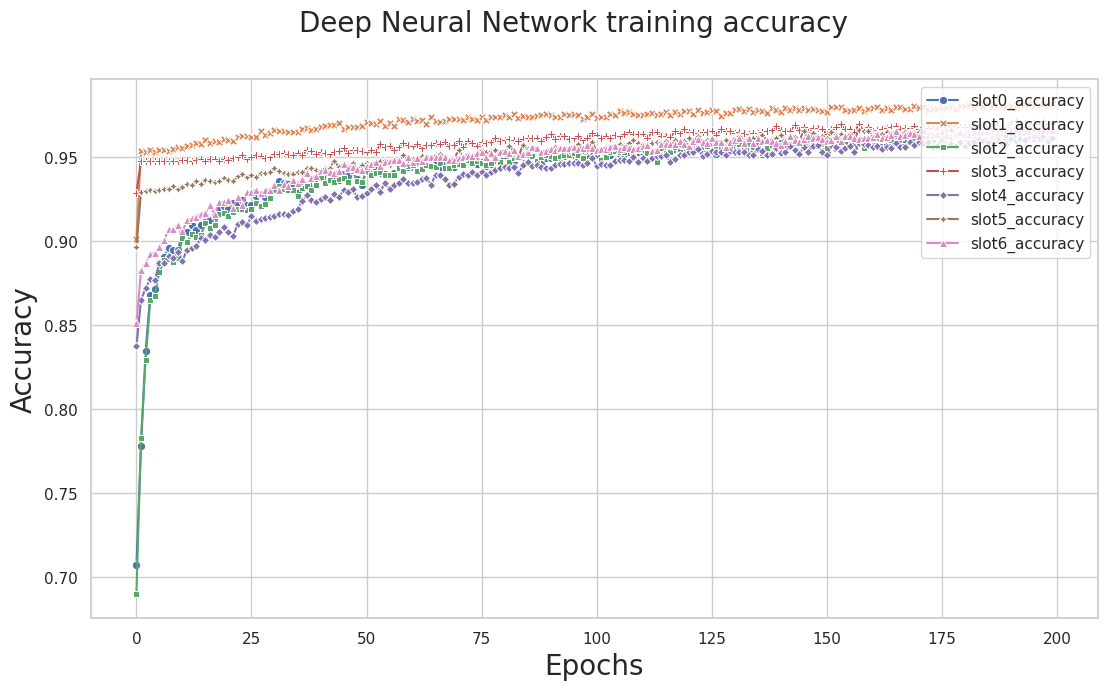

In [15]:
to_keep = []
for c in df.columns:
    if "slot" in c and "accuracy" in c and "val" not in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_acc = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_acc,markers=True, dashes=False)
fig.suptitle('Deep Neural Network training accuracy ', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(loc='upper right')

# 2. MLP without edge features

In [16]:
df = pd.read_csv("mlp_edge_features_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'loss', 'mean_squared_error', 'val_loss',
        'val_mean_squared_error'],
       dtype='object'),
 5)

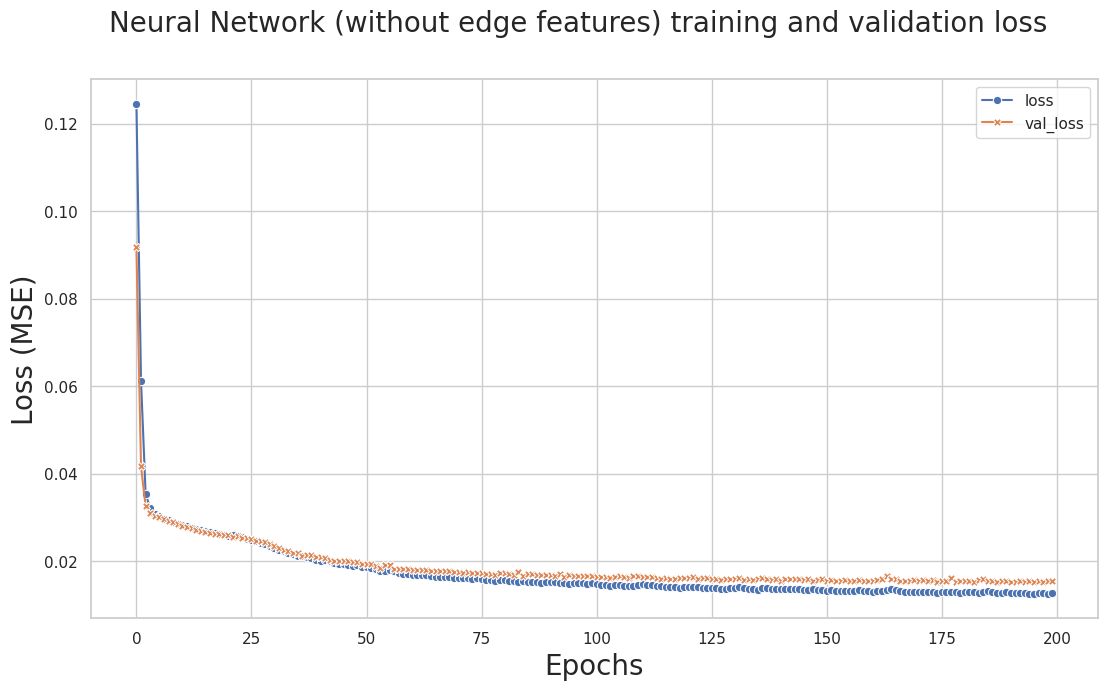

In [17]:
to_keep = []
for c in df.columns:
    if "loss" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Neural Network (without edge features) training and validation loss', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.legend(loc='upper right')

# 3. MLP with edge features

In [18]:
df = pd.read_csv("mlp_train_loss.csv")
df.columns, len(df.columns)

(Index(['Unnamed: 0', 'loss', 'mean_squared_error', 'val_loss',
        'val_mean_squared_error'],
       dtype='object'),
 5)

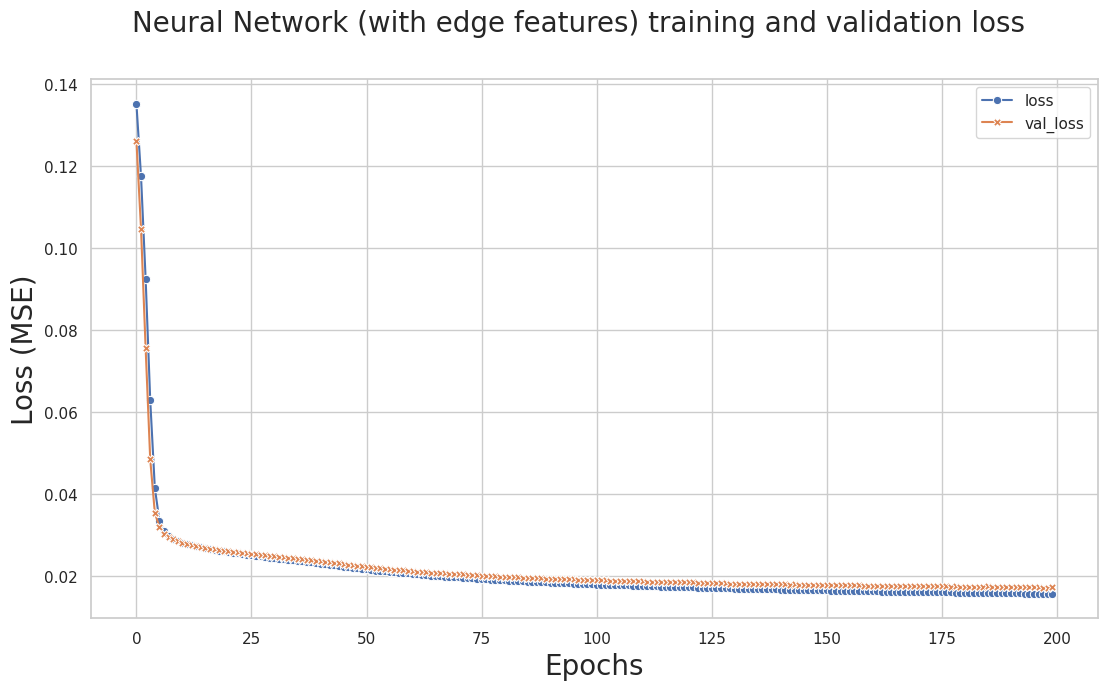

In [19]:
epochs=df['Unnamed: 0']+1
to_keep = []
for c in df.columns:
    if "loss" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df_loss,markers=True, dashes=False)
fig.suptitle('Neural Network (with edge features) training and validation loss', fontsize=20)
plt.xlabel("Epochs", fontsize=20)
plt.ylabel("Loss (MSE)", fontsize=20)
plt.legend(loc='upper right')

# 4. Compare training time

In [20]:
f = open("dnn_accuracy.txt","r")
lines = f.readlines()
f.close()
dnn_training_time = float(lines[-1].split(":")[1])
dnn_training_acc = float(lines[1].split(":")[1])
dnn_test_acc = float(lines[3].split(":")[1])

In [21]:
f = open("mlp_accuracy.txt","r")
lines = f.readlines()
f.close()
mlp_training_time = float(lines[-1].split(":")[1])
mlp_training_acc = float(lines[0].split(":")[1])
mlp_test_acc = float(lines[1].split(":")[1])

In [22]:
f = open("mlp_edge_features_accuracy.txt","r")
lines = f.readlines()
f.close()
mlp_edge_training_time = float(lines[-1].split(":")[1])
mlp_edge_training_acc = float(lines[0].split(":")[1])
mlp_edge_test_acc = float(lines[1].split(":")[1])

In [23]:
df = pd.DataFrame()
df["Model"] = ["Deep Neural Network","NN without edge features","NN with edge features"]
df["Training time"] = [dnn_training_time,mlp_training_time,mlp_edge_training_time]
df["Training Accuracy"] = [dnn_training_acc,mlp_training_acc,mlp_edge_training_acc]
df["Test Accuracy"] = [dnn_test_acc,mlp_test_acc,mlp_edge_test_acc]
# df["DNN"] = dnn_training_time
# df["NN without edges"] = mlp_training_time
# df["NN with edges"] = mlp_edge_training_time
df = df.round(4)
df

,Model,Training time,Training Accuracy,Test Accuracy
0,Deep Neural Network,125.5341,0.9569,0.9393
1,NN without edge features,4.4139,0.8717,0.8708
2,NN with edge features,6.0549,0.9013,0.8978


Text(0, 0.5, 'Training Time (sec)')

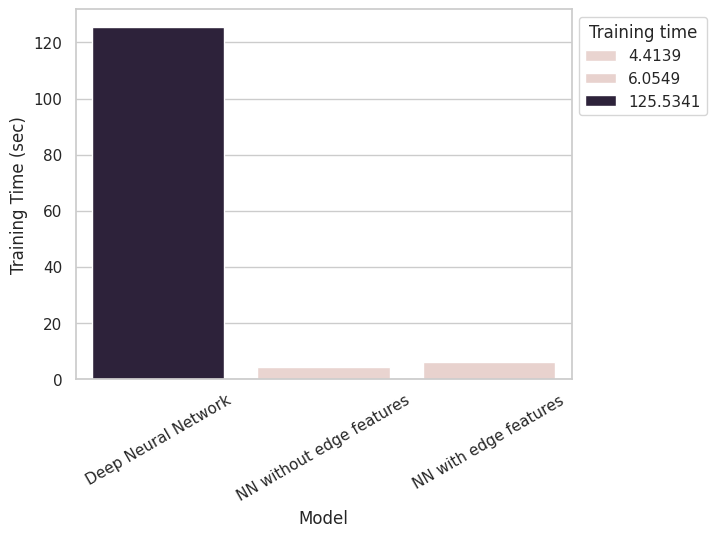

In [24]:
ax = sns.barplot(x="Model", y="Training time",hue="Training time", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
plt.ylabel("Training Time (sec)", fontsize=12)

Text(0, 0.5, 'Training Accuracy')

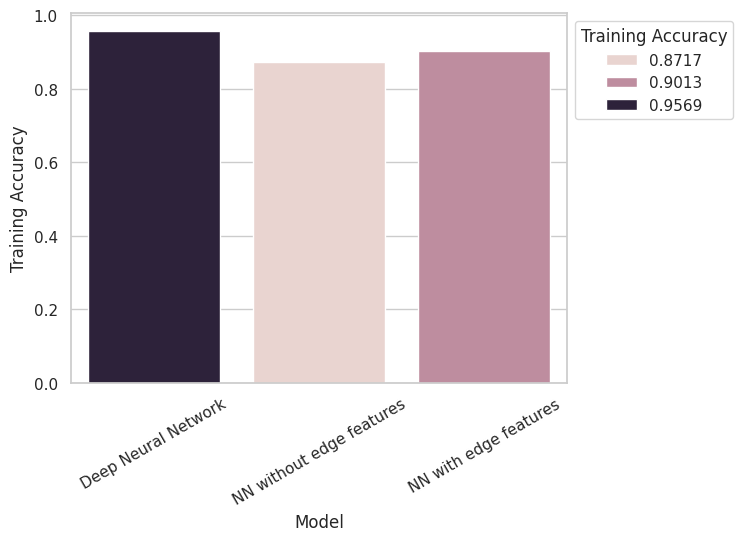

In [25]:
ax = sns.barplot(x="Model", y="Training Accuracy",hue="Training Accuracy", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
plt.ylabel("Training Accuracy", fontsize=12)

Text(0, 0.5, 'Test Accuracy')

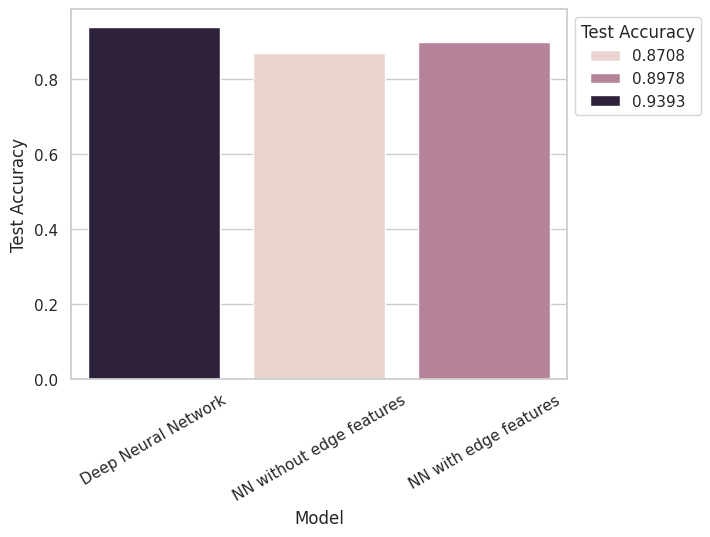

In [26]:
ax = sns.barplot(x="Model", y="Test Accuracy",hue="Test Accuracy", data=df)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
plt.ylabel("Test Accuracy", fontsize=12)

# 5. Parameters

In [27]:
import tensorflow as tf
from tensorflow import keras
dnn = tf.keras.models.load_model("dnn.keras")
mlp = tf.keras.models.load_model("mlp.keras")
mlp_ef = tf.keras.models.load_model("mlp_edge_features.keras")


In [28]:
dnn.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 89)]         0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 264)          23760       input[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1024)         271360      dense_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 1024)         0           dense_2[0][0]                    
____________________________________________________________________________________________

In [29]:
mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 89)]              0         
_________________________________________________________________
dense (Dense)                (None, 70)                6300      
_________________________________________________________________
dense_1 (Dense)              (None, 49)                3479      
Total params: 9,779
Trainable params: 9,779
Non-trainable params: 0
_________________________________________________________________


In [30]:
mlp_ef.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 378)]             0         
_________________________________________________________________
dense (Dense)                (None, 189)               71631     
_________________________________________________________________
dense_1 (Dense)              (None, 94)                17860     
_________________________________________________________________
dense_2 (Dense)              (None, 49)                4655      
Total params: 94,146
Trainable params: 94,146
Non-trainable params: 0
_________________________________________________________________


In [31]:
# n=127
# ip_features_dnn = n*(n-1)+3*n+4*n
# ip_features_mlp_no_edge = n*(n-1)+3*n+4*n
# ip_features_mlp_edge = 9*n*(n-1)


In [32]:
N = 100
def get_param_count_dnn(n):
    ip_features_dnn = n*(n-1)+3*n+4*n
    layers = [ip_features_dnn, ip_features_dnn*4, ip_features_dnn*4*4]
    num_params = 0
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
        
    slot_layers = []
    curr_size = layers[-1]
    while curr_size >= (n):
        next_layer_size = int(curr_size/4)
        if next_layer_size > (n):
            slot_layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            slot_layers.append(n)
            break
        
    slot_num_params = 0
#     print(n,layers+slot_layers)
    for i in range(1,len(slot_layers)-1):
        slot_num_params = slot_num_params + (slot_layers[i-1]+1)*slot_layers[i]
    num_params = num_params + slot_num_params*n
    return num_params

In [33]:
dnn_params = []
for n in range(N):
    dnn_params.append(get_param_count_dnn(n))
# dnn_params

In [34]:
def get_param_count_nn(n):
    ip_features_mlp_no_edge = n*(n-1)+3*n+4*n
    layers = [ip_features_mlp_no_edge]
    curr_size = layers[0]
    while curr_size >= (n*n):
        next_layer_size = int(curr_size/1.2)
        if next_layer_size > (n*n):
            layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            layers.append(n*n)
            break
#     print(layers)
    num_params = 0
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
    return num_params

In [35]:
nn_params = []
for n in range(N):
    nn_params.append(get_param_count_nn(n))
# nn_params

In [36]:
def get_param_count_nn_edge(n):
    ip_features_mlp_no_edge = 9*n*(n-1)
    layers = [ip_features_mlp_no_edge]
    curr_size = layers[0]
    while curr_size >= (n*n):
        next_layer_size = int(curr_size/2)
        if next_layer_size > (n*n):
            layers.append(next_layer_size)
            curr_size = next_layer_size
        else:
            layers.append(n*n)
            break
    num_params = 0
#     print(layers)
    for i in range(1,len(layers)):
        num_params = num_params + (layers[i-1]+1)*layers[i]
    return num_params

In [37]:
nn_edge_params = []
for n in range(N):
    nn_edge_params.append(get_param_count_nn_edge(n))
# nn_params

In [38]:
df = pd.DataFrame()
df["Deep Neural Network"] = dnn_params
df["Neural Network without edge features"] = nn_params
df["Neural Network with edge features"] = nn_edge_params
df

,Deep Neural Network,Neural Network without edge features,Neural Network with edge features
0,0,0,0
1,3675,90,0
2,19944,562,211
3,59445,1736,1975
4,137000,3605,7819
...,...,...,...
95,43576859480,86603900,4329654200
96,45794691936,90252288,4515876396
97,48099934655,94014728,4708007617
98,50498858158,97893572,4906170845


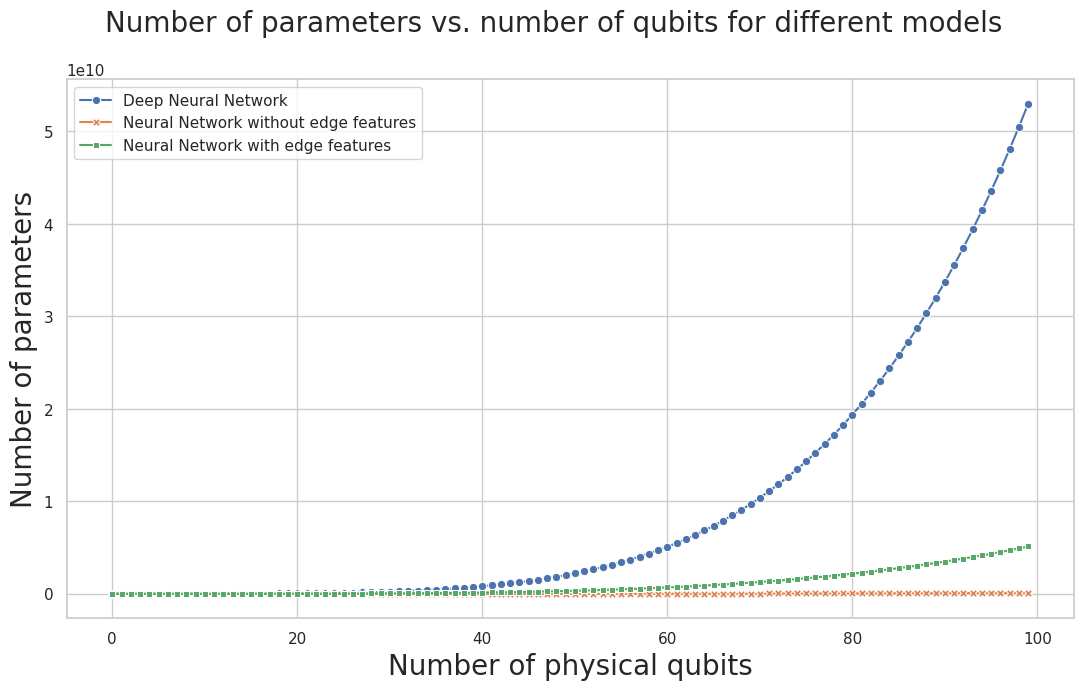

In [39]:
to_keep = []
for c in df.columns:
    if "loss" in c:
        to_keep.append(c)
to_drop = []
for c in df.columns:
    if c not in to_keep:
        to_drop.append(c)
df_loss = df.drop(to_drop,axis=1)
sns.set_theme(style="whitegrid")
a4_dims = (13,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df,markers=True, dashes=False)

fig.suptitle('Number of parameters vs. number of qubits for different models', fontsize=20)
plt.xlabel("Number of physical qubits", fontsize=20)
plt.ylabel("Number of parameters", fontsize=20)
plt.legend(loc='upper left')

# 6. Mapping vs. depth

In [40]:
df = pd.read_csv("mapping_vs_depth.csv")

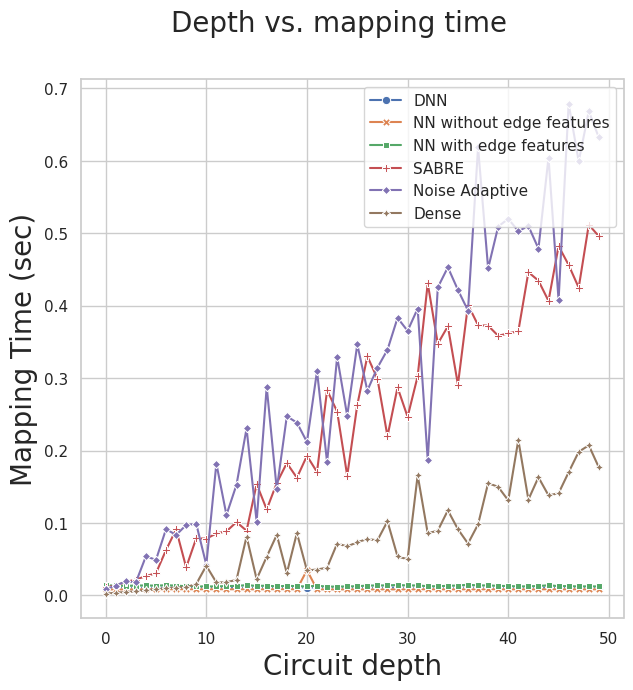

In [41]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df,markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')



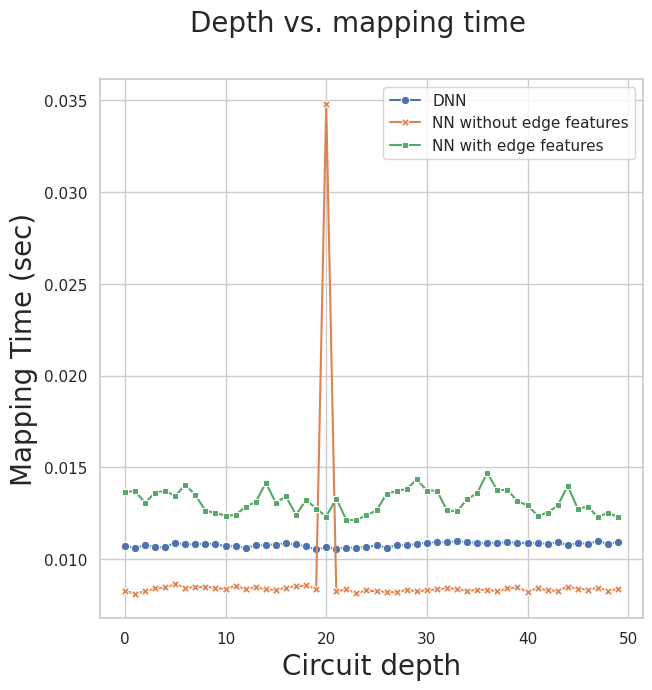

In [42]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[["DNN","NN without edge features","NN with edge features"]],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')



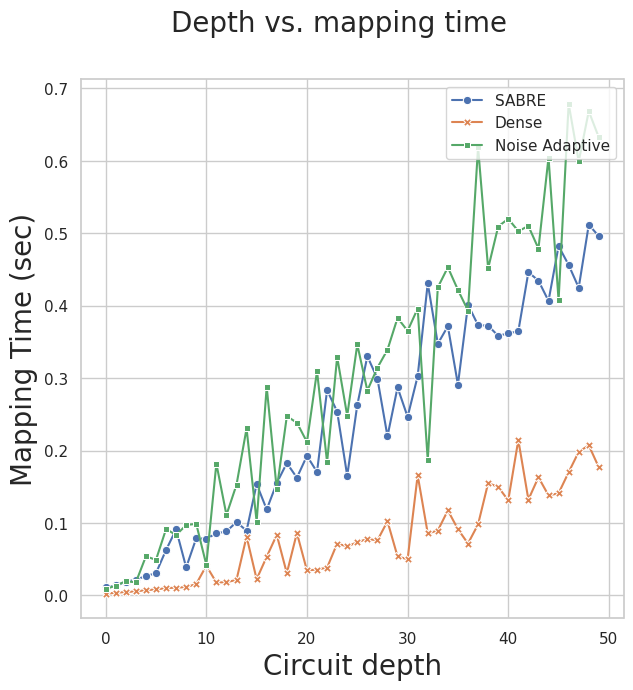

In [43]:
sns.set_theme(style="whitegrid")
a4_dims = (7,7)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(data = df[["SABRE","Dense","Noise Adaptive"]],markers=True, dashes=False)
fig.suptitle('Depth vs. mapping time ', fontsize=20)
plt.xlabel("Circuit depth", fontsize=20)
plt.ylabel("Mapping Time (sec)", fontsize=20)
plt.legend(loc='upper right')